# Handout 3 (FYD600/GU): Reinforcement learning; one-step Q-learning
### Authors: Mats Granath, Jonatan Wårdh, and Oleksandr Balabanov

(2019, revised 2020)

In this project we will look at reinforcement learning (RL), which is a machine learning method that deals with  problems where we are trying to find an optimal way of maneuvering in an environment that can give rewards or penalties depending on our actions. Examples are learning to play board games (https://www.youtube.com/watch?v=TnUYcTuZJpM) or computer games (https://youtu.be/cUTMhmVh1qs) or having a robot learn to walk by trial and error (https://www.youtube.com/watch?v=gn4nRCC9TwQ).   

There is a well developed body of theory around these types of problems (see Sutton and Barto book), but in the spirit of this course we will concentrate on a small part of the topic and dig into that with a practical excercise. In particular we will focus on the RL method known as "one-step Q-learning", as it is conceptually quite simple (but powerful) and often used in practice. 

This handout (3) is quite seperate from the supervised learning using artificial neural networks that we studied in handout 1 and 2. But in the last handout (4) we will make the connection by using, so called, deep Q-learning, where an ANN is used. (More on that later.) 

### Basic definitions and theory. 

We consider a type of game where an "agent" takes at each time step an "action" $a$, for example taking a step in some direction or placing a stone on a Go board. Before taking the action, the system or environment that the agent lives in is in some "state" $s$. (I.e. for a game of Go, the state is the configuration of stones on the board.) After the action the environment responds in some way (the agents stone is placed and the opponent places a stone) resulting in a new state of the system $s'$. In the general case the transition $s\rightarrow s'$ would result in some reward $r$ given to the agent (negative or positive or zero). (For the Go game the reward maybe only given at the end, positive if the game is won, negative if it's lost. This is a problem with so called sparse-reward, which is particularly difficult.) 

The objective of the game is to get to the end of the game with the the highest "return", $R$ where return is the cumulative reward. When calculating the return it is customary (and important for many problems) to use a discounting factor $0<\gamma\leq 1$, that implies that reward further on is less valuable than immediate reward. With this, the return at time $t$ is defined as $R_t=\sum_{t'=t}^\infty\gamma^{t'-t}r_{t'}$, where there is an implicit assumption that we are following some particular sequence of actions with the corresponding rewards. 

To decide what action $a$ to take in a given state $s$ the agent uses a policy $\pi(s,a)$, which could correspond to a unique choice or a probability distribution. We are interested in finding the "optimal" policy $\pi_{opt}$, that in any state $s$ will give the maximum return when following it to the end.

A useful object to quantify the whole proceedure is the "action-value" function $Q(s,a)$. It is defined as the return given by taking $a$ in $s$ and subsequently following the optimal policy, which can be written in an iterative form $Q(s,a)=r+\gamma\max_{a'}Q(s',a')$. Thus, correspondingly, the optimal policy will in fact be the one that in each step uses the action that maximizes $Q$, i.e. to find  $\pi_{opt}$ we should calculate $Q$.

To calculate $Q$ we need to explore the set of states, taking different actions, and collect rewards. There are different ways of doing this, but a standard way is to do "one-step Q-learning" using an $\epsilon$-greedy policy. It goes as follows:

$\bullet$ in state $s$ use your current estimate of $Q(s,a)$ to decide on a best action $a$ (maximizing $Q$). Use this action with probability $1-\epsilon$, but with probability $\epsilon$ take a random action. $0\leq\epsilon\leq 1$ is a parameter that quantifies a trade off between exploiting the current best estimate of the optimal policy and to explore the full space of possible rewards. (For problems with very big state-action space it is not possible to explore the full space, thus necessary to use a small $\epsilon$, while for small worlds one can even use $\epsilon=1$.) 

$\bullet$ feed action $a$ to the environmment that will respond by moving to state $s'$ and giving reward $r$. 

$\bullet$ this last move provides an estimate 
$r+\gamma\max_{a'}Q(s',a')$ for $Q(s,a)$. (Note that this is not necessarily the correct value for $Q(s,a)$ as the next time you take action $a$ in state $s$ you may get a different reward, $Q(s',a')$ may have changed, and you may even end up in a different state $s'$ if there is some stochastic ingredient in moving between states.) Increment your value (estimate) by mixing in some part ($\alpha<1$) of the most recent estimate 
$Q(s,a)\leftarrow(1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$. (This is what "one-step" implies; we could have explored further, weighing the rewards of several steps into the upgrade of $Q$.)

$\bullet$ keep playing,from state $s'$ take another $\epsilon$-greedy action $a'$ to state $s''$ and update $Q(s',a')$. (Restart the game if you reach a terminal state.) Unless you get stuck in some part of the state-action space you will converge to the correct $Q$ function and the corresponding optimal policy after many games. 

# Assignment

Construct an RL agent using one-step Q-learning to find the optimal path from start to finish in a "grid world". </b> The grid world is a rectangular board where the agent can move in the cardinal directions. The board is surrounded by sheer cliffs giving death and a large negative reward. There are also "fires" on the board, that are not fatal but gives a large negative reward. In addition, to make things more intersting, there is a treacherous "wind" that can make you go in a completely unintended direction. Every step gives a negative reward; you want to get to goal in as few steps as possible. Reaching goal gives the only positive reward available on the board. 

Some basic functions and definitions are provided. But you need to set up the training and test it by tuning parameters.

Here we will give you some help with constructing the code. We will provide you with a template, but you do not have to use it. You should find the most suitable parameters yourself. However, use <code>wind=0.1</code>, the probability of taking a random step, unless otherwise specified.

In [1]:
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

In [2]:
# Define parameters (you should find suitable values)
alpha= 0.5 #learning rate
gamma= 0.3 #discounting rate
epsilon= 0.3 #for the epsilon-greedy policy
wind=0.0 # chance that action results in random move

In [3]:
# Setup grid 
startpos=np.array([0,19])
goalpos=np.array([10,0])
size_grid_x=30
size_grid_y=50

# Setup Q matrix (size,size,4) matrix for the 4 actions up,down,left,right=0,1,2,3
Q=np.zeros((size_grid_x,size_grid_y,4))  

The grid will consist of squares of "fire" and a "goal". The edge of the grid will be considered a "cliff". The game ends if you end up at the goal, which will yield a reward of 100. The game also ends if you fall over the cliff resulting in a -100 reward. You can walk through fire, but it yields a negative reward of -50 for each step. Every other step yields a -1 reward, meaning that we want to find the shortest path to the goal.

It is convenient to use python's dictionaries to associate the different squares of the grid with the values specified above. A dictionary is a list which associate an output to a label that you specify. This should be clear from the following definitions

In [4]:
# the reward associated with each obstacle
reward_list = {'fire': -50 , 'cliff': -100, 'goal': 100 , 'start' : -1 , '-' : -1 }
# the state of the game: 1 meaning the game has ended 
state_list = {'fire': -1 , 'cliff': 1, 'goal': 1 , 'start' : -1 , '-' : -1 }

from which you can extract the values according to (note the [  ] brackets) 

In [5]:
reward_list['fire']

-50

Next we define a function that constructs the grid (it will be a nested list, not a numpy array)

In [6]:
# Make grid
def make_grid():

    # Add padding, add an extra row, accessible trough index -1
    grid = [['-' for y in range(size_grid_y+1)] for x in range(size_grid_x+1)]
    
    for x in range(size_grid_x+1):
        for y in range(size_grid_y+1):
            #goal
            if x==goalpos[0]  and y==goalpos[1] :
                # store object
                grid[x][y] = 'goal'

            #cliff
            if x==size_grid_x  or y==size_grid_y :
                grid[x][y] = 'cliff'
                
            #fires
            elif (3<= x <=7) and (3<= y <= 7):
                grid[x][y] = 'fire'
    
            elif x==startpos[0]  and y==startpos[1] :
                grid[x][y] = 'start'

    return grid


Let us make a function that can plot this grid in a nice way 

In [7]:
# Plot grid, pass None if you do not want to print a path 
def dispGrid(grid):
    grid_RGB = np.ones((size_grid_x,size_grid_y,3))*0.7 # 
    
    for x in range(size_grid_x):
        for y in range(size_grid_y):
            
            if grid[x][y]=='goal':
                grid_RGB[x,y,:] = np.array([245/255,237/255,48/255]) # Yellow
                
            if grid[x][y]=='fire':
                grid_RGB[x,y,:] = np.array([203/255,32/255,40/255]) # Red '-' #pit    
   
            if grid[x][y]=='start':
                grid_RGB[x,y,:] = np.array([0/255,254/255,0/255]) # Red '-' #pit    
   
   
    
    return grid_RGB

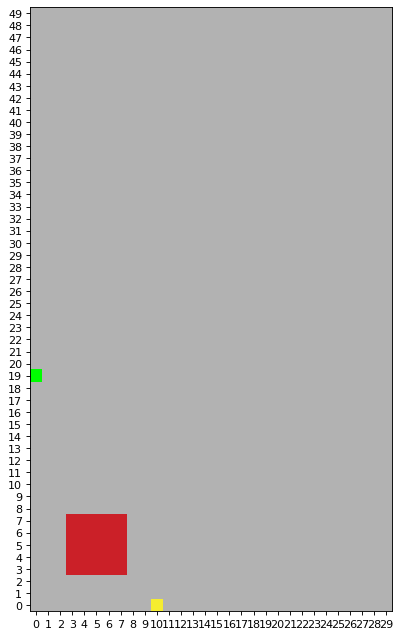

In [8]:
# make the grid
grid = make_grid()
# convert it to colors
plot_grid =dispGrid(grid)

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
# We have to invert the x and y axis , go over to numpy array instead
plt.imshow(np.swapaxes(np.array(plot_grid),0,1))
#plt.axis('on')
plt.gca().invert_yaxis()
plt.xticks(np.arange(0, size_grid_x, dtype=np.int))
plt.yticks(np.arange(0, size_grid_y, dtype=np.int))
plt.show()

It helps to write a function <code>action_fcn(q_in,epsilon,wind)</code> which takes as input 
<code>q_in , epsilon, wind</code> and gives <code> move, action</code> as output.

The variable <code>q_in</code> is the value for the four different actions 0,1,2,3 (corresponding to up,down,left,right) at a particular position of the $Q$-matrix, i.e. it is an array with four entries. The output <code>action</code> should be the action taken according to the epsilon greedy procedure, i.e. 0,1,2 or 3. However, we will also include wind which means that the actual move taken by the player has a probability <code>wind</code> to be just a random move in any direction. Let <code>move</code> be the actual move preformed when wind is taken into account. 


In [9]:
import random

def action_fcn(q_in,epsilon,wind):
    
    #Find action accordning to epsilon greedy
    if random.random() < epsilon:
        action = random.randint(0,3)
    
    else:
        action = np.argmax(q_in)
    
    #With "wind" there is a chance that the action gives a different reaction, i.e. move.
    #Construct move with a probability (set by the parameter wind) to be just a step 
    if random.random() < wind:
        move = random.randint(0,3)
    
    else:
        move = action
        
    #Outout
    return move, action

Now it is time to construct the main loop of the program. Loop through a big number of games, try 100000. Run each game until you go outside the grid, the 'cliff', or if you reach the goal. 

In [10]:
up,down,left,right=0,1,2,3
tot_goals = 0
# loop over games
for games in range(10): #100000
    # Initilize the player at the start position and store the current position in position
    position = startpos.copy()
    state = state_list[str(grid[position[0]][position[1]])]
    
    # loop over steps taken by the player
    while state == -1: #the state of the game is -1, terminate if 1 (see state_list above)
        # Find out what move to make using
        old_location = position.copy()
        print(Q[position[0]][position[1]])
        move, action = action_fcn(Q[position[0]][position[1]], epsilon, wind)
        
        # update location
        if move == up: position[1] += 1
        elif move == down: position[1] -= 1
        elif move == left: position[0] -= 1
        elif move == right: position[0] += 1
        
        # Update Q. Remember that it is the variable action that determines what entry of the Q-matris that should be 
        # updated, not move
        state = state_list[str(grid[position[0]][position[1]])]
        
        if state == -1:
            r = reward_list[str(grid[position[0]][position[1]])]
            Q[old_location[0], old_location[1], action] = (1 - alpha) * Q[old_location[0], old_location[1], action] + alpha * (r + gamma * max(Q[position[0], position[1], :]))

        if str(grid[position[0]][position[1]]) == 'goal':
            print('Awesome, game: ' + str(games))
            tot_goals += 1
            print('Total: ' + str(tot_goals))
        
        

[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[-0.5  0.   0.   0. ]
[-0.5  0.   0.   0. ]
[-0.5  0.   0.   0. ]
[0. 0. 0. 0.]
[-0.5 -0.5  0.   0. ]
[0. 0. 0. 0.]
[-0.5  -0.75  0.    0.  ]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[-0.5  0.   0.   0. ]
[-0.5  0.   0.   0. ]
[-0.5  0.   0.   0. ]
[-0.5  0.   0.   0. ]
[-0.5  0.   0.   0. ]
[0. 0. 0. 0.]
[-0.5 -0.5  0.   0. ]
[ 0.   0.   0.  -0.5]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[ 0.  -0.5  0.   0. ]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[-0.5  -0.75  0.   -0.5 ]
[-0.5  -0.75  0.   -0.5 ]
[-0.5 -0.5  0.   0. ]
[-0.75 -0.75  0.   -0.5 ]
[-0.75 -0.75  0.   -0.5 ]
[-0.5  0.   0.   0. ]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[-0.5  0.   0.   0. ]
[-0.5  0.   0.   0. ]
[-0.5 -0.5  0.   0. ]
[-0.75  -0.875  0.    -0.5  ]
[-0.5 -0.5 -0.5  0. ]
[0. 0. 0. 0.]
[-0.5  0.   0.   0. ]
[-

This is the basic structure of the Q-learning. Now you should have constructed a $Q$ matrix which stores the value of making any of the four different actions for each state.  

## Questions:

Answer the following questions:

$\bullet$ Construct the Q-learning algorithm according to the above. Find suitable values for <code>alpha, gamma, epsilon</code>. Observations?

$\bullet$ There is a fundamental difference between the two random components $\epsilon$ and <code>wind</code>. What?

$\bullet$ Experiment and disuss the difference bwetween using an $\epsilon$ close to 0 or close to 1. 

$\bullet$ The $Q$-matrix contains all information about the optimal way to play this game. Find the optimal path to move according the $Q$-matrix, i.e. in every step make the move with highest value. Plot the optimal path on the grid by including it in the <code>dispGrid(grid)</code> function. What happens if you set <code>wind=0</code> during training and why? 

$\bullet$ Plot the state-value function $V(s)$. The state-value function is the biggest Q-value of actions for each state i.e. $V(s) = \text{max}_a Q(s,a)$. To plot this function, use <code>plt.imshow</code> in the Matplotlib package. What does this object signify? Compare it to the plot given above. Why is the "fire" smaller in this picture? 


$\bullet$ Run the subsequent routines to diagnose the outcome, and discuss the results. 


## Diagnosis and plot routines

<Figure size 432x288 with 0 Axes>

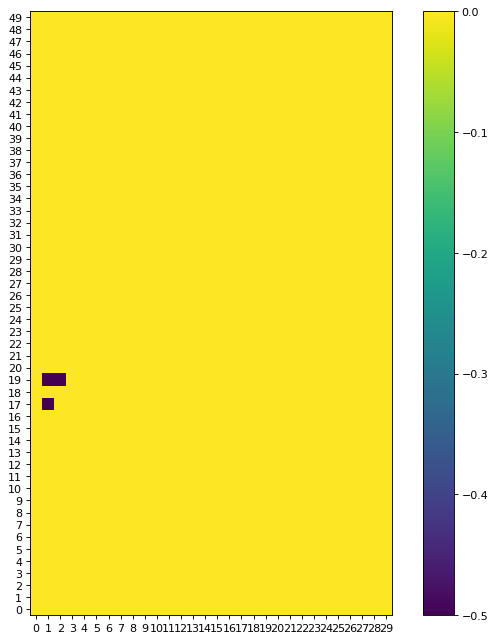

In [11]:
#What does it show?
z=Q.max(axis=2)
#z=z.T
#z=np.flip(z,axis=0)
#z=np.flip(z,axis=1)
plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.swapaxes(z,0,1))
plt.colorbar()
#plt.grid(False)
plt.gca().invert_yaxis()
plt.xticks(np.arange(0, size_grid_x, dtype=np.int))
plt.yticks(np.arange(0, size_grid_y, dtype=np.int))
plt.show()

In [12]:
#a path
location=startpos
path=np.array([startpos])
reaction=0
step_count=0;
while reaction !=1:
    q_state=Q[location[0],location[1],:]
    step_count+=1
    move, action = action_fcn(q_state,0.0,0.0)  #take optimal move
    location_new=location+move

    obstacle = grid[location_new[0]][location_new[1]]       
    reaction = state_list[obstacle]
    
    location=location_new
    
    path=np.append(path,[location],axis=0)
    if step_count>100:
        break
print(path,step_count)



[[ 0 19]
 [ 2 21]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]
 [ 5 24]] 101


In [13]:
#plot above path
grid = make_grid()
plot_grid =dispGrid(grid,path)

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
# We have to invert the x and y axis , go over to numpy array instead
plt.imshow(np.swapaxes(np.array(plot_grid),0,1))
#plt.axis('on')
plt.gca().invert_yaxis()
plt.xticks(np.arange(0, size_grid_x, dtype=np.int))
plt.yticks(np.arange(0, size_grid_y, dtype=np.int))
plt.show()

TypeError: dispGrid() takes 1 positional argument but 2 were given